In [66]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
%matplotlib inline

In [67]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 4)

In [68]:
import os
dir = os.path.dirname(os.getcwd())
sampFreq, sound = wavfile.read(dir + '/audios/record-672279722.51811.wav')

# this sample is taken taken 44100 times per second, each with 16-bit bit depth
# the sound pressure values are mapped to integer values ranging from -2^15 to 2^15-1
sound.dtype, sampFreq

(dtype('int16'), 44100)

In [69]:
# This wav file has two channels and 2535441 sample points
sound.shape

(2535441, 2)

In [70]:
# normalize? the saple points to be ranging from -1 to 1 and float
sound = sound / 2.0**15

In [71]:
# length in seconds = number of sample points / sampling frequency
length_in_s = sound.shape[0] / sampFreq
print(length_in_s)

57.49299319727891


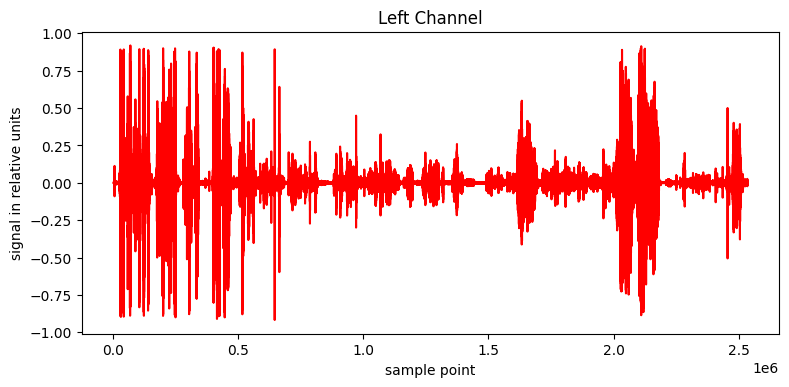

In [72]:
plt.subplot()
plt.plot(sound[:,0], 'r')
plt.xlabel("sample point")
plt.ylabel('signal in relative units')
plt.title('Left Channel')
plt.show()

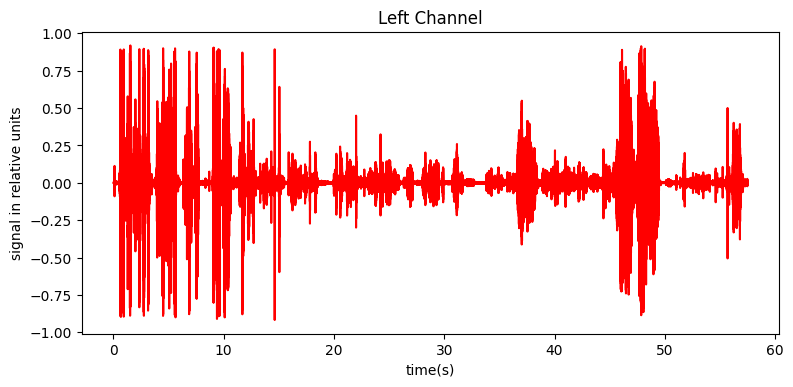

In [73]:
'''
    Creating the time-domain graph
'''
# create a time array
time = np.arange(sound.shape[0]) / sampFreq

plt.subplot()
plt.plot(time, sound[:,0], 'r')
plt.xlabel('time(s)')
plt.ylabel('signal in relative units')
plt.title('Left Channel')
plt.show()

In [74]:
# work with only one channel
signal = sound[:,0]

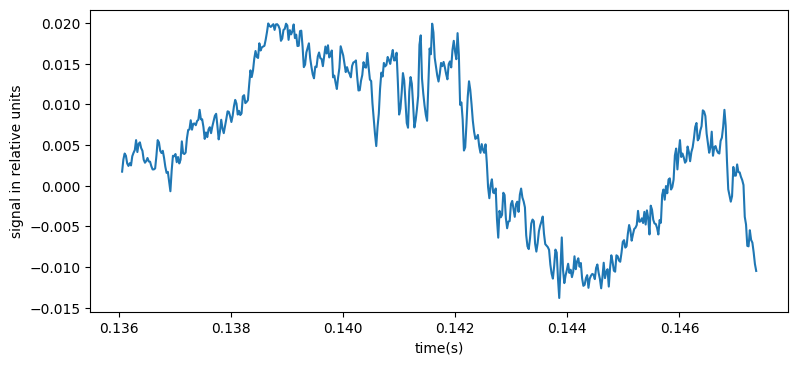

In [75]:
# episode: take a closer look into the above graph
plt.plot(time[6000:6500], signal[6000:6500])
plt.xlabel('time(s)')
plt.ylabel('signal in relative units')
plt.show()

In [76]:
'''
    FFT
'''
fft_spectrum = np.fft.rfft(signal)
# always goes with np,fft,rfft
freq = np.fft.rfftfreq(signal.size, d=1./sampFreq)
fft_spectrum

array([ 0.79864502+0.j        ,  0.25986256+0.62706245j,
       -0.49873621+0.4532488j , ..., -0.05286362+0.01970116j,
       -0.03726935-0.06509053j,  0.07102092-0.01019639j])

In [77]:
# get the signal magnitude
magnitude = np.abs(fft_spectrum)

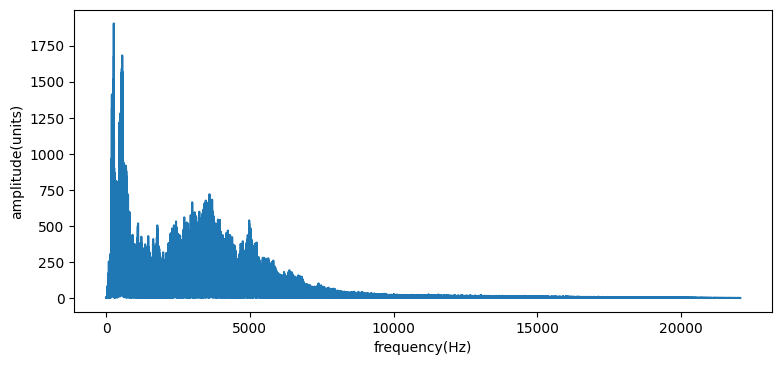

In [78]:
plt.plot(freq, magnitude)
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude(units)')
plt.show()

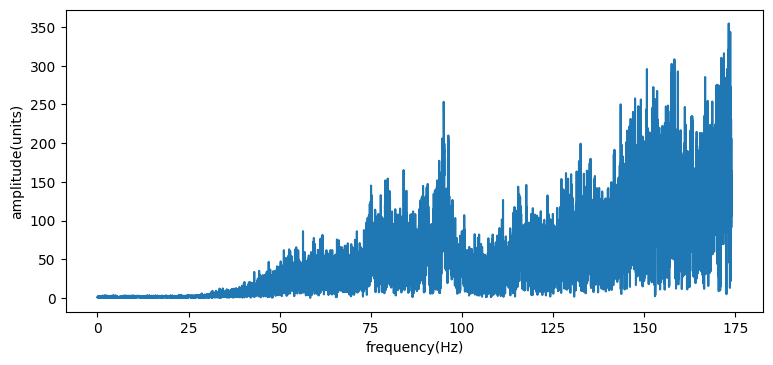

In [79]:
# zoom in on the highst peaks
# TODO: why it's not in frequency but... it's not frequencies in freq!
plt.plot(freq[:10000], magnitude[:10000])
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude(units)')
plt.show()

In [80]:
for i,f in enumerate(freq):
    if f < 165 or f > 400:# filter out voices not from the child
        fft_spectrum[i] = 0.0
    if f < 21 or f > 20000:# filter out the frequencies below/above the human hearing range
        fft_spectrum[i] = 0.0

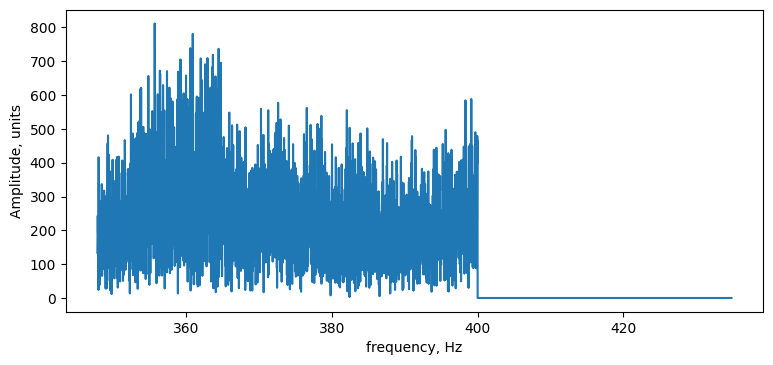

In [81]:
plt.plot(freq[20000:25000], np.abs(fft_spectrum[20000:25000]))
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

In [82]:
# recreate the original signal via an inverse FFT
child_signal = np.fft.irfft(fft_spectrum)

In [83]:
# write it back
wavfile.write(dir + '/audios/record-672279722.51811-child.wav', sampFreq, child_signal)